<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   user_id                            10000 non-null  object        
 1   subscription_duration              10000 non-null  int64         
 2   recent_login_time                  10000 non-null  datetime64[ns]
 3   average_login_time                 10000 non-null  float64       
 4   average_time_per_learning_session  10000 non-null  float64       
 5   monthly_active_learning_days       10000 non-null  int64         
 6   total_completed_courses            10000 non-null  int64         
 7   recent_learning_achievement        10000 non-null  float64       
 8   abandoned_learning_sessions        10000 non-null  int64         
 9   community_engagement_level         10000 non-null  int64         
 10  preferred_difficulty_level         

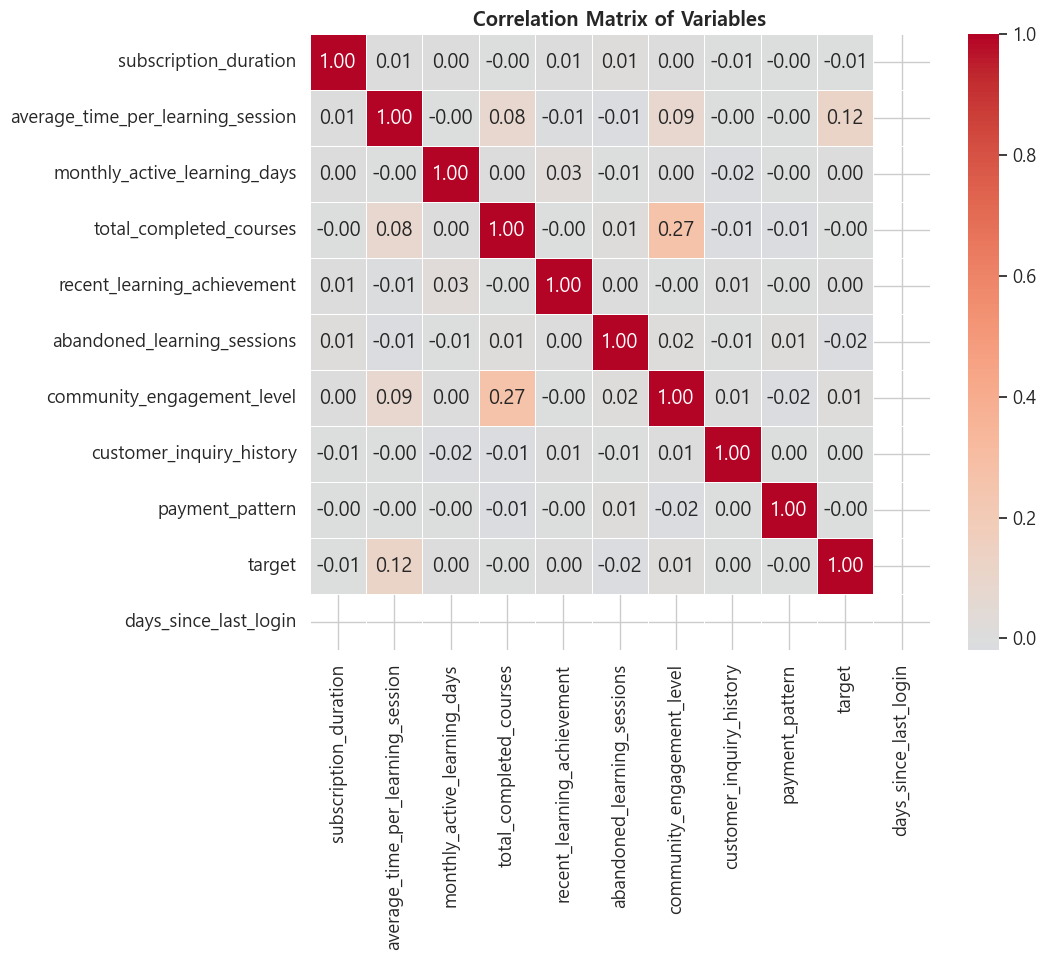

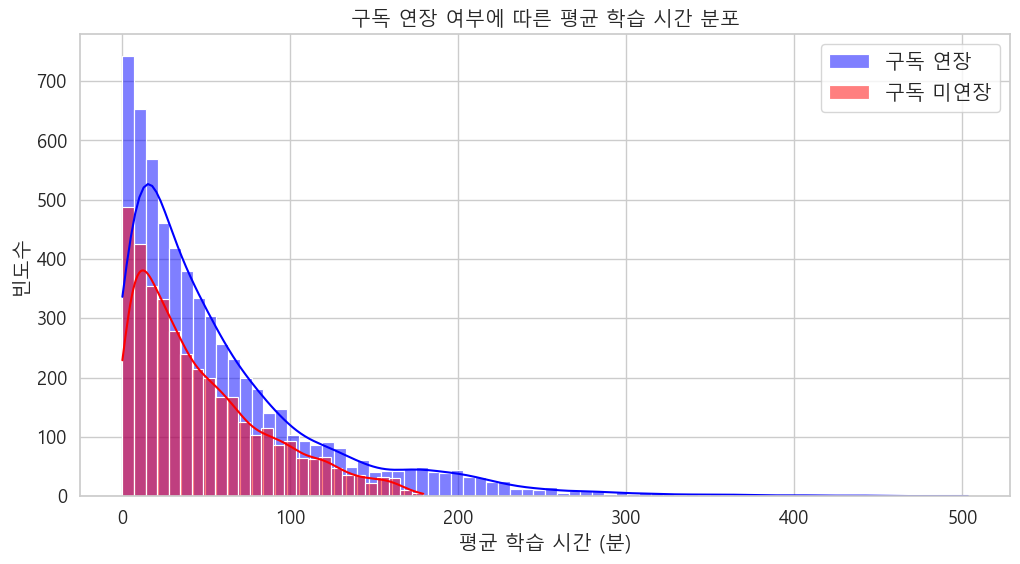

             mean        std
target                      
0       46.456986  39.639733
1       60.105533  63.477523


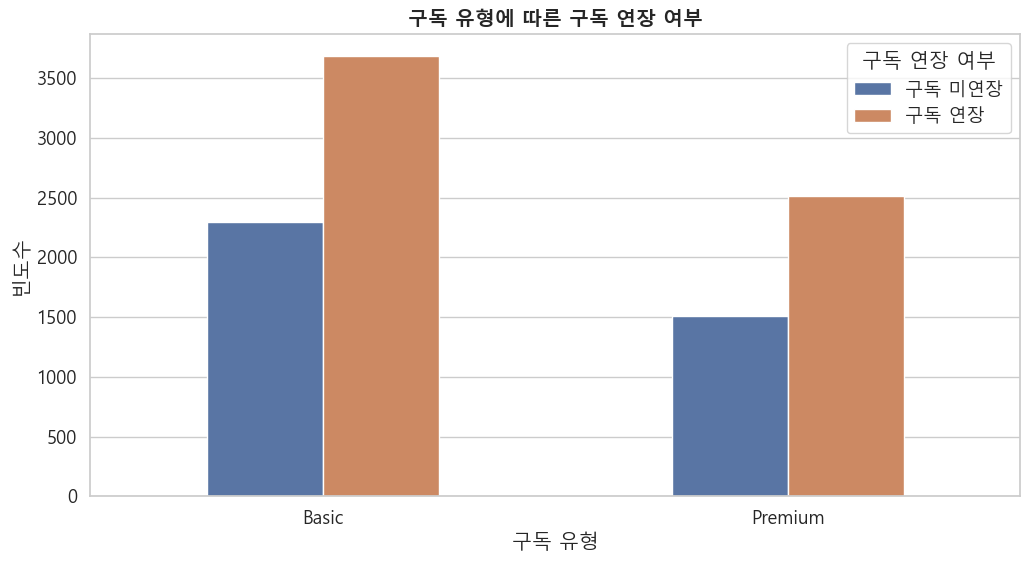

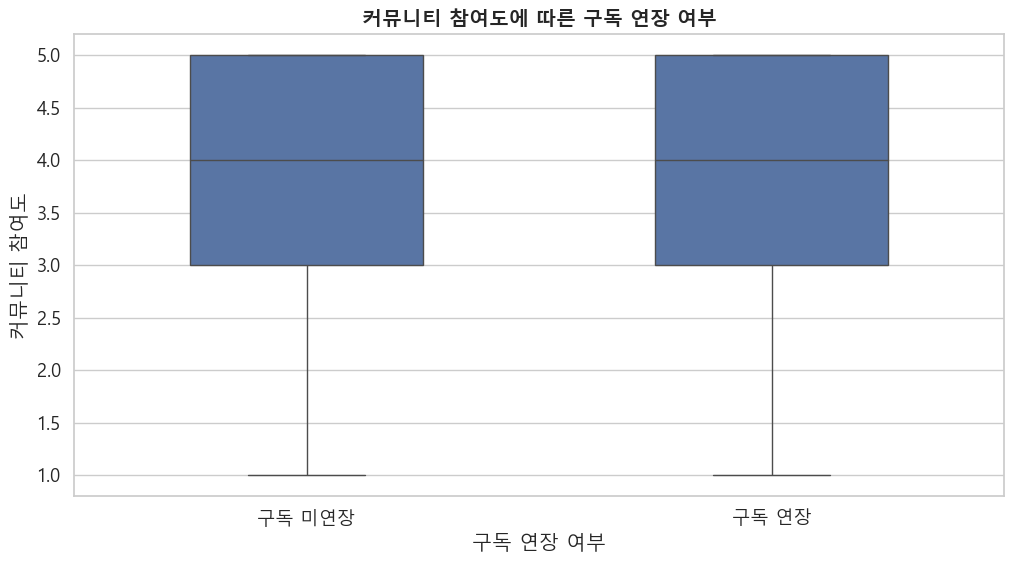

클래스 비율:
 target
1    6199
0    3801
Name: count, dtype: int64
Consider handling these columns appropriately.
혼동 행렬:
[[485 273]
 [726 516]]

분류 보고서:
              precision    recall  f1-score   support

           0       0.40      0.64      0.49       758
           1       0.65      0.42      0.51      1242

    accuracy                           0.50      2000
   macro avg       0.53      0.53      0.50      2000
weighted avg       0.56      0.50      0.50      2000



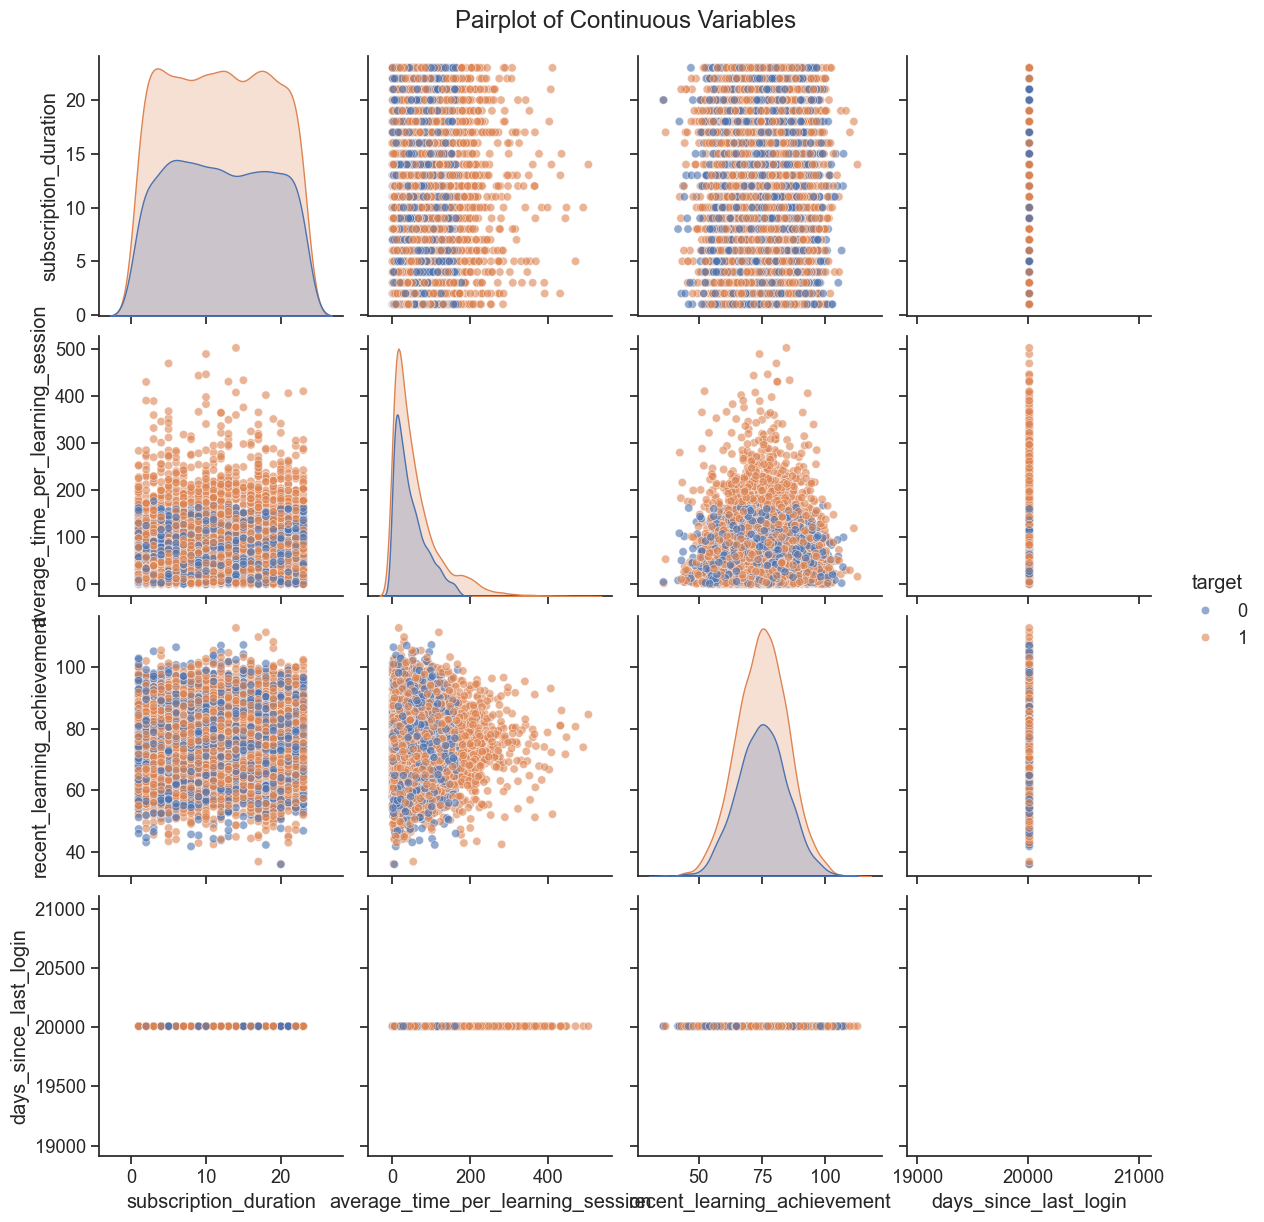

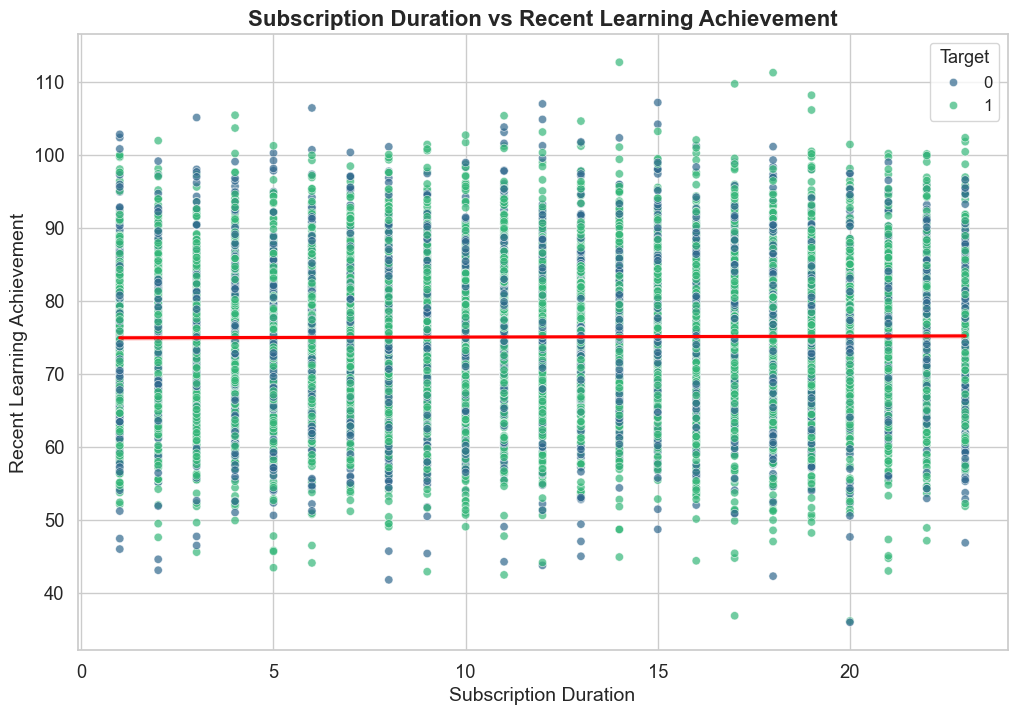

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# 데이터 로드
df = pd.read_csv('C:\\workspace\\WASSUP4\\data\\mini.csv', sep=',')

# 수치형 변수의 결측치를 중위값으로 대체
imputer = SimpleImputer(strategy='median')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# 스케일링을 적용할 변수들
scaler = StandardScaler()
scaled_cols = ['subscription_duration', 'average_time_per_learning_session', 'monthly_active_learning_days']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

# Label Encoding
label_encoder = LabelEncoder()
df['subscription_type'] = label_encoder.fit_transform(df['subscription_type'])


df.head()


import pandas as pd

df = pd.read_csv('C:\\workspace\\WASSUP4\\data\\mini.csv', sep=',')



df_subset = df[['subscription_duration',              # 구독 기간 (월) - 사용 기간이 길수록 서비스에 대한 충성도가 높을 가능성
                'average_time_per_learning_session',  # 각 학습 세션에 소요된 평균 시간 (분) - 최근에 로그인한 사용자는 서비스에 지속적인 관심이 있을 가능성
                'monthly_active_learning_days',       # 월간 활동적인 학습 일수 - 서비스 참여도가 높아 구독을 연장할 가능성
                'total_completed_courses',            # 완료한 총 코스 수 - 완료한 코스 수가 많을수록 학습 성과에 만족할 가능성
                'abandoned_learning_sessions',        # 중단된 학습 세션 수 - 중단한 학습 세션이 적을수록 사용자 인내도가 높아 구독을 유지할 가능성
                'community_engagement_level',         # 커뮤니티 참여도 - 서비스에 활발히 기여
                'recent_login_time',                  # 마지막으로 로그인한 시간 (일) - 최근에 로그인한 사용자는 서비스에 지속적인 관심이 있을 가능성
                'average_login_time',                 # 평균 로그인 시간 - 로그인하는 시간이 규칙적일수록 사용자 학습 습관이 안정적일 가능성
                'recent_learning_achievement',        # 최근 학습 성취도 - 최근 학습 성과가 높을수록 사용자 만족도가 높아 구독 연장에 긍정적일 가능성
                'preferred_difficulty_level',         # 선호하는 난이도 - 선호하는 난도에 맞는 콘텐츠가 있으면 서비스 만족도가 높아질 가능성
                'target'                              # 구독 연장 여부
               ]]

df_subset.head()

# 마지막 로그인 후 지난 일수 = recent_login_time - 현재날짜

from datetime import datetime

df['recent_login_time'] = pd.to_datetime(df['recent_login_time'])

df['days_since_last_login'] = (datetime.now() - df['recent_login_time']).dt.days

df_subset = df[['subscription_duration', 'average_time_per_learning_session', 
                'monthly_active_learning_days', 'total_completed_courses', 
                'abandoned_learning_sessions', 'community_engagement_level', 
                'days_since_last_login', 'average_login_time', 
                'recent_learning_achievement', 'preferred_difficulty_level', 
                'target']]

df_subset.head()
df.info()


# 날짜/시간 형식 변환
df['recent_login_time'] = pd.to_datetime(df['recent_login_time'])
df['average_login_time'] = pd.to_datetime(df['average_login_time'], errors='coerce')  # 에러 발생 시 NaT로 처리

# 숫자형 형식 변환
df['subscription_duration'] = df['subscription_duration'].astype(float)
df['average_time_per_learning_session'] = df['average_time_per_learning_session'].astype(float)
df['monthly_active_learning_days'] = df['monthly_active_learning_days'].astype(int)
df['total_completed_courses'] = df['total_completed_courses'].astype(int)
df['abandoned_learning_sessions'] = df['abandoned_learning_sessions'].astype(int)

# 범주형 형식 변환
df['preferred_difficulty_level'] = df['preferred_difficulty_level'].astype('category')
df['subscription_type'] = df['subscription_type'].astype('category')

df['days_since_last_login'].unique()

# days_since_last_login 변수의 모든 값이 20007로 동일, 이 변수는 분석에 유의미한 정보를 제공하지 못하기 때문에 제거


# 상관관계 값이 1에 가까울수록 강한 양의 상관관계를, -1에 가까울수록 강한 음의 상관관계를 나타냄.
# 상관관계가 0에 가까운 값이라면 해당 변수는 구독 연장 여부에 큰 영향을 미치지 않음.

numeric_df_subset = df.select_dtypes(include=['float64', 'int64', 'int32', 'int8'])
correlation_matrix = numeric_df_subset.corr()

correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print(correlation_with_target)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Variables")
plt.show()

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path)
plt.rc('font', family=fontprop.get_name())
plt.rc('axes', titleweight='bold')

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 1]['average_time_per_learning_session'], kde=True, color='blue', label='구독 연장')
sns.histplot(df[df['target'] == 0]['average_time_per_learning_session'], kde=True, color='red', label='구독 미연장')
plt.title("구독 연장 여부에 따른 평균 학습 시간 분포", fontproperties=fontprop)
plt.xlabel("평균 학습 시간 (분)", fontproperties=fontprop)
plt.ylabel("빈도수", fontproperties=fontprop)
plt.legend(prop=fontprop)
plt.show()


# 구독 연장 여부에 따른 평균 및 표준편차 계산
grouped_data = df.groupby('target')['average_time_per_learning_session'].agg(['mean', 'std'])
print(grouped_data)


# 구독 유형에 따른 구독 연장 여부
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='subscription_type', hue='target', width=0.5)  # width를 0.5로 설정
plt.title("구독 유형에 따른 구독 연장 여부", fontweight='bold')
plt.xlabel("구독 유형")
plt.ylabel("빈도수")
plt.legend(title="구독 연장 여부", labels=["구독 미연장", "구독 연장"])
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='target', y='community_engagement_level', width=0.5)
plt.title("커뮤니티 참여도에 따른 구독 연장 여부", fontweight='bold')
plt.xlabel("구독 연장 여부")
plt.ylabel("커뮤니티 참여도")
plt.xticks([0, 1], ["구독 미연장", "구독 연장"])
plt.show()
y = df['target']
print("클래스 비율:\n", y.value_counts())

# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# datetime 열 처리
df['recent_login_days'] = (pd.Timestamp.now() - df['recent_login_time']).dt.total_seconds() / (24 * 60 * 60)
df['average_login_hour'] = df['average_login_time'].dt.hour + df['average_login_time'].dt.minute / 60

# datetime 열 삭제
df = df.drop(['recent_login_time', 'average_login_time'], axis=1)

# target 열을 제외한 독립 변수와 target을 종속 변수로 설정
X = df.drop('target', axis=1)
y = df['target']

# 범주형 변수를 원-핫 인코딩으로 변환
X = pd.get_dummies(X, columns=['preferred_difficulty_level', 'subscription_type'], drop_first=True)

# object 타입 열 확인 및 처리
object_columns = X.select_dtypes(include=['object']).columns
if len(object_columns) > 0:
    print(f"Warning: The following columns are still of object type: {object_columns}")
    print("Consider handling these columns appropriately.")
    X = X.drop(columns=object_columns)  # 또는 적절한 방법으로 처리

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = model.predict(X_test_scaled)
print("혼동 행렬:")
print(confusion_matrix(y_test, y_pred))
print("\n분류 보고서:")
print(classification_report(y_test, y_pred))

# 연속형 변수 선택
continuous_vars = ['subscription_duration', 'average_time_per_learning_session', 
                   'recent_learning_achievement', 'days_since_last_login']

# 페어플롯 생성
sns.set(style="ticks", font_scale=1.2)
g = sns.pairplot(df[continuous_vars + ['target']], 
                 hue='target', 
                 diag_kind='kde', 
                 plot_kws={'alpha': 0.6},
                 height=3)

# 그래프 제목 설정
g.fig.suptitle("Pairplot of Continuous Variables", y=1.02)

# 그래프 저장 (선택사항)
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')

plt.show()

# 데이터 불러오기 (이 부분은 이미 데이터프레임이 있다면 생략 가능)
# df = pd.read_csv('your_data.csv')

# 그래프 스타일 설정
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# 산점도 그리기
sns.scatterplot(data=df, x='subscription_duration', y='recent_learning_achievement', 
                hue='target', palette='viridis', alpha=0.7)

# 선형회귀선 추가
sns.regplot(data=df, x='subscription_duration', y='recent_learning_achievement', 
            scatter=False, color='red')

# 그래프 제목과 레이블 설정
plt.title('Subscription Duration vs Recent Learning Achievement', fontsize=16)
plt.xlabel('Subscription Duration', fontsize=14)
plt.ylabel('Recent Learning Achievement', fontsize=14)

# 범례 설정
plt.legend(title='Target', title_fontsize='13', fontsize='12')

# 그래프 저장 (선택사항)
# plt.savefig('scatterplot_regression.png', dpi=300, bbox_inches='tight')

# 그래프 표시
plt.show()
